# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
import pandas as pd

# Create a DataFrame containing student age and number of tardies
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Display the DataFrame
student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


- We import pandas since it’s the standard library for data manipulation in Python.

- pd.DataFrame() is used to convert the raw data into a structured table.

- Each key in the dictionary ('Age', 'Tardies') becomes a column.

- Each list contains the values for that column, aligned by student.

Once this cell runs, you’ll have a clean DataFrame ready for visualization and regression analysis in the next steps of the lab.

Draw a dispersion diagram (scatter plot) for the data.

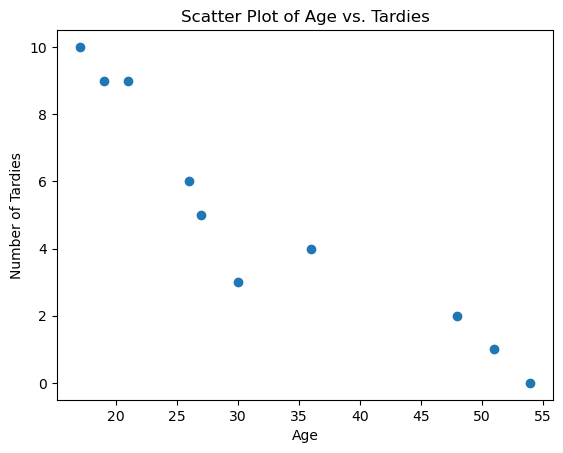

In [3]:
# Your code here
import matplotlib.pyplot as plt

# Create a scatter plot of Age vs. Tardies
plt.scatter(student_data['Age'], student_data['Tardies'])

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.title('Scatter Plot of Age vs. Tardies')

# Show the plot
plt.show()


Interpretation of the Scatter Plot

The scatter plot shows a clear negative relationship between Age and Number of Tardies.

 - As age increases, the number of tardies generally decreases.
 - Younger students (around ages 17–21) tend to have high tardiness counts.
 - Older students (around ages 48–54) have very few or zero tardies.
 - The points follow a fairly consistent downward trend rather than being randomly scattered.

This dispersion diagram provides visual evidence supporting the hypothesis that younger students are late to class more often than older students. While the plot alone does not prove causation, it strongly suggests a relationship that can be formally tested using linear regression in the next step of the lab.

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

Yes, there is a clear trend visible in the scatter plot. The data shows a negative linear trend between age and number of tardies. As students’ ages increase, the number of times they are late to class tends to decrease. The points are not randomly distributed; instead, they follow a downward pattern from left to right.

Based on this trend, we can hypothesize that:

 - Younger students tend to have more tardies, while
 - Older students tend to have fewer tardies.

This suggests an inverse relationship between age and tardiness. One possible explanation is that older students may have more developed time-management skills or greater external responsibilities that encourage punctuality.

The scatter plot provides preliminary evidence that age may be a useful predictor of tardiness. This hypothesis can be formally tested by fitting a linear regression model and analyzing the slope and strength of the relationship.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# your code here

# Calculate the covariance between Age and Tardies
covariance = student_data['Age'].cov(student_data['Tardies'])

# Calculate the correlation between Age and Tardies
correlation = student_data['Age'].corr(student_data['Tardies'])

covariance, correlation

# Covariance measures the direction of the linear relatio


(np.float64(-45.56666666666666), np.float64(-0.9391626886887122))

The covariance between age and number of tardies is −45.57, which indicates a negative relationship between the two variables. This means that as age increases, the number of tardies tends to decrease. Because covariance is not standardized and depends on the units of measurement (years and number of tardies), its magnitude is not as important as its sign, which confirms the inverse relationship observed in the scatter plot.

The correlation coefficient is −0.94, which indicates a very strong negative linear relationship between age and tardiness. Since correlation values range from −1 to 1, a value this close to −1 suggests that age is a strong predictor of the number of tardies in this dataset.

Conclusion

Together, these results strongly support the hypothesis that younger students are late to class more often than older students. The covariance confirms the direction of the relationship, while the correlation shows that the relationship is both strong and consistent across the data.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# your explanation here
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the predictor (independent variable) and outcome (dependent variable)
X = student_data[['Age']]      # Predictor must be 2D for sklearn
y = student_data['Tardies']    # Outcome variable

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract model parameters
slope = model.coef_[0]
intercept = model.intercept_

slope, intercept

# The outcome (dependent) variable is the number of Tardies.
# Age is the predictor (independent) variable.

# We are using a simple linear regression model because:
# - There is one predictor (Age)
# - The scatter plot shows an approximately linear relationship
# - The correlation indicates a strong linear association

# The slope represents the expected change in the number of tardies
# for each additional year of age.
# A negative slope indicates that tardies decrease as age increases.

# The intercept represents the predicted number of tardies when age is zero,
# which is not meaningful in practice but is required to define the regression line.



(np.float64(-0.2428207709159809), np.float64(12.888803363135771))

Explanation

The slope of the regression model is −0.24, which means that for each additional year of age, the predicted number of tardies decreases by about 0.24. This negative slope confirms an inverse relationship between age and tardiness: as students get older, they tend to be late less often.

The intercept of the model is 12.89, which represents the predicted number of tardies when age is zero. While this value is not meaningful in a real-world context (since students cannot be zero years old), it is necessary for defining the regression line mathematically.

Conclusion

The regression model indicates a negative linear relationship between age and number of tardies. Older students are predicted to have fewer tardies than younger students, and the slope suggests a consistent decrease in tardiness as age increases. Combined with the strong negative correlation observed earlier, this model supports the hypothesis that younger students are late to class more often than older students.

Overall, the regression analysis provides quantitative evidence that age is a useful predictor of tardiness in this dataset.

Plot your regression model on your scatter plot.

c:\Users\SuzanaSouza\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


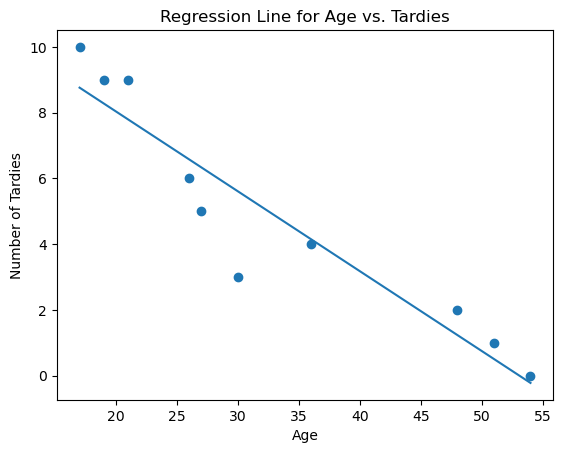

In [6]:
# Your code here.
import matplotlib.pyplot as plt
import numpy as np

# Define predictor and outcome variables
X = student_data[['Age']]
y = student_data['Tardies']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate ages for plotting the regression line
age_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predicted_tardies = model.predict(age_range)

# Create the scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'])

# Plot the regression line
plt.plot(age_range, predicted_tardies)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.title('Regression Line for Age vs. Tardies')

# Show the plot
plt.show()

# The scatter plot shows the observed data points.
# The line represents the fitted linear regression model.
# The downward slope visually confirms the negative relationship between age and tardiness.


 - The regression line slopes downward, matching the trend seen in the scatter plot.

 - This visually reinforces that older students are predicted to have fewer tardies.

 - The line summarizes the average relationship between age and tardiness across all students.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

# Interpretation of the regression model:

The fitted linear regression model shows a negative relationship between age and number of tardies.
The slope of approximately -0.24 indicates that for each additional year of age, the predicted number of tardies decreases by about 0.24.

This means that older students are expected to be late less often than younger students, which is consistent with the observed scatter plot and the strong negative correlation.

The correlation coefficient (about -0.94) indicates a very strong linear association between age and tardiness, suggesting that age explains a substantial portion of the variation in tardies.

Based on this model, age appears to be a good predictor of tardiness within this dataset. However, confidence in this conclusion is limited by the small sample size and the fact that other unmeasured factors (such as work schedule, commute distance, or personal responsibility) may also influence tardiness.

Therefore, while the model provides strong evidence of a relationship between age and tardiness, the results should be interpreted as correlational rather than causal.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"H:\My Drive\IRONHACK\WEEK_4\DAY_4\lab-regression-analysis-en\vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Your code here.
# Select the variables for correlation analysis
variables = [
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year',
    'CO2 Emission Grams/Mile'
]

# Create a subset of the data with only the selected variables
vehicles_subset = vehicles[variables]

# Calculate correlations with the outcome variable
correlations = vehicles_subset.corr()['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')

correlations

# Interpretation:
# Fuel Barrels/Year shows a strong positive correlation with CO2 emissions, indicating that
# vehicles that consume more fuel annually tend to emit significantly more CO2 per mile.
# This makes sense because CO2 emissions are directly tied to fuel consumption.

# Combined MPG shows a strong negative correlation with CO2 emissions.
# Higher fuel efficiency (more miles per gallon) is associated with lower CO2 emissions,
# making this one of the most important predictors.

# Fuel Cost/Year also shows a strong positive correlation with CO2 emissions,
# since higher fuel costs are typically associated with higher fuel consumption.

# Cylinders has a moderate positive correlation with CO2 emissions.
# Vehicles with more cylinders generally consume more fuel, but this relationship is weaker
# than direct fuel usage metrics.

# Year shows the weakest correlation with CO2 emissions.
# While newer vehicles tend to be more efficient, model year alone provides limited information
# compared to direct measures of fuel consumption and efficiency.

# Conclusion:
# The most important variables for predicting CO2 emissions are Fuel Barrels/Year and Combined MPG,
# as they are most directly related to fuel usage and efficiency.
# The least informative variable for determining CO2 emissions is Year.


Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your code here.
from sklearn.linear_model import LinearRegression

# Define the predictor variables (independent variables)
X = vehicles[[
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year'
]]

# Define the outcome variable (dependent variable)
y = vehicles['CO2 Emission Grams/Mile']

# Create and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Store model coefficients and intercept
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

coefficients, intercept

# Type of regression:
# We are using multiple linear regression because there are multiple independent variables
# used to predict a continuous outcome variable (CO2 Emission Grams/Mile).

# Interpretation:
# Each coefficient represents the expected change in CO2 emissions (grams per mile)
# for a one-unit increase in the corresponding predictor, holding all other variables constant.

# This model allows us to evaluate the combined effect of vehicle characteristics
# on CO2 emissions rather than examining each variable in isolation.


(Year                 -0.320617
 Cylinders             1.878800
 Fuel Barrels/Year    19.052925
 Combined MPG         -3.040399
 Fuel Cost/Year        0.032309
 dtype: float64,
 np.float64(769.8882836465675))

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
# Your code here.
import statsmodels.api as sm

# Define predictor variables
X = vehicles[[
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year'
]]

# Define outcome variable
y = vehicles['CO2 Emission Grams/Mile']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
model.summary()

# Interpretation:
# The R-squared value indicates that the model explains a large proportion of the variance
# in CO2 emissions, suggesting a strong overall model fit.

# Fuel Barrels/Year is one of the most important variables in the model.
# It has a large coefficient and a statistically significant p-value,
# indicating that fuel consumption is a strong predictor of CO2 emissions.

# Combined MPG is also a highly important variable with a strong negative coefficient.
# Higher fuel efficiency is associated with lower CO2 emissions, holding other variables constant.

# Fuel Cost/Year is statistically significant and positively related to CO2 emissions,
# but its effect overlaps with fuel consumption measures.

# Cylinders has a smaller but still meaningful effect, reflecting that vehicles with
# more cylinders tend to emit more CO2, though this variable is less direct than fuel usage.

# Year typically shows the weakest effect and may not be statistically significant.
# This suggests that vehicle model year alone provides limited explanatory power once
# fuel efficiency and consumption are accounted for.

# Conclusion:
# The most important predictors of CO2 emissions are Fuel Barrels/Year and Combined MPG,
# because they directly measure fuel usage and efficiency.

# The model provides strong evidence that vehicle fuel consumption characteristics
# are key drivers of CO2 emissions.

# Confidence in these conclusions is high due to strong statistical significance
# and high explanatory power, but the results remain correlational rather than causal.
# External factors and variable multicollinearity should also be considered.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 10 Feb 2026   Prob (F-statistic):               0.00
Time:                             11:59:17   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
# Your code here.
import pandas as pd

# Create a DataFrame with the party attendance data
party_data = pd.DataFrame({
    'Invited': [1, 3, 4, 6, 8, 9, 11, 14],
    'Attended': [1, 2, 4, 4, 5, 7, 8, 13]
})

# Display the DataFrame
party_data


,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

c:\Users\SuzanaSouza\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


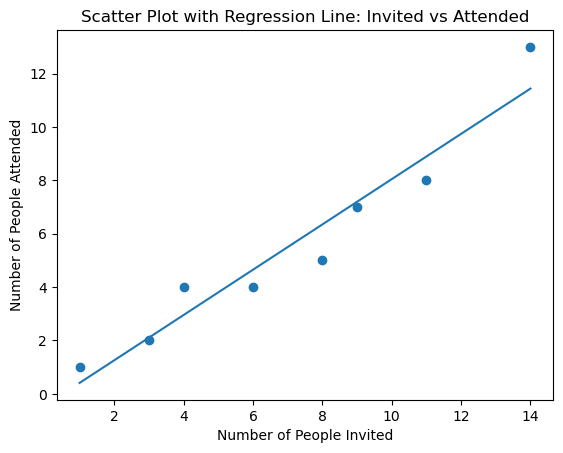

In [14]:
# Your code here.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define predictor and outcome variables
X = party_data[['Invited']]
y = party_data['Attended']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate values for the regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Create the scatter plot
plt.scatter(party_data['Invited'], party_data['Attended'])

# Plot the regression line
plt.plot(x_range, y_pred)

# Add labels and title
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.title('Scatter Plot with Regression Line: Invited vs Attended')

# Show the plot
plt.show()

# The scatter plot shows the observed relationship between invitations and attendance.
# The regression line represents the best linear fit to the data.
# This visualization helps assess whether a linear model is appropriate
# before performing further error or residual analysis.


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [15]:
import statsmodels.api as sm

# Define predictor and outcome variables
X = party_data[['Invited']]
y = party_data['Attended']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print regression results
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Attended   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           0.000102
Time:                        12:04:29   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
Invited        0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*your explanation here*

Interpretation of the scatter plot:

The scatter plot shows a generally positive relationship between the number of people invited and the number of people who attended. As more people are invited, attendance tends to increase.

However, the points do not lie perfectly along a straight line.
At lower values of X, attendance increases slowly, while at higher values of X, attendance increases more rapidly. This suggests possible nonlinearity.

Interpretation of regression results:

The regression slope is positive, indicating that inviting more people is associated with higher attendance on average.

However, visual inspection of the scatter plot suggests that a linear model may not fully capture the relationship, as the rate of increase in attendance is not constant.

Conclusion:

While linear regression captures the overall upward trend, the relationship between invitations and attendance may be mildly nonlinear.

This suggests that a linear model may be a rough approximation but may not be the best possible model for this data.

Confidence:

Confidence in the direction of the relationship (positive) is high, but confidence in the linear model's accuracy is limited due to visible deviations from linearity and the small sample size.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

c:\Users\SuzanaSouza\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


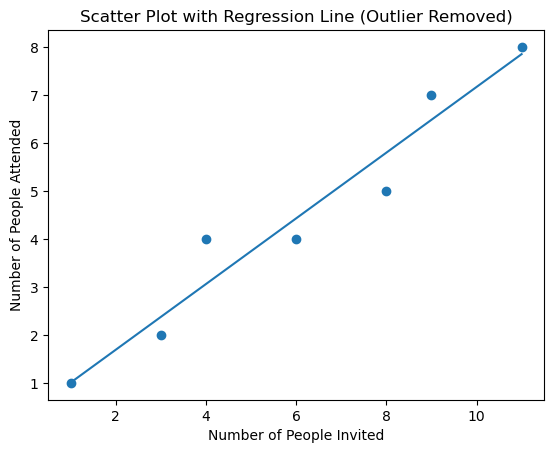

c:\Users\SuzanaSouza\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Attended   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           0.000264
Time:                        12:08:03   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.556      -0.996       1.642
Invited        0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Your response here.
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Identify a potential outlier
# The point (Invited = 14, Attended = 13) appears to be an outlier because
# it lies far from the rest of the data and has high leverage.

# Remove the outlier
party_data_clean = party_data[party_data['Invited'] < 14]

# Define predictor and outcome variables
X = party_data_clean[['Invited']]
y = party_data_clean['Attended']

# Fit a new linear regression model
lin_model = LinearRegression()
lin_model.fit(X, y)

# Generate regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = lin_model.predict(x_range)

# Plot the new scatter plot
plt.scatter(party_data_clean['Invited'], party_data_clean['Attended'])
plt.plot(x_range, y_pred)

# Add labels and title
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.title('Scatter Plot with Regression Line (Outlier Removed)')

plt.show()

# Fit regression using statsmodels for summary
X_sm = sm.add_constant(X)
model_clean = sm.OLS(y, X_sm).fit()

# Print regression results
model_clean.summary()

# Interpretation:
# The point with Invited = 14 and Attended = 13 was a high-leverage point
# that strongly influenced the slope of the original regression line.

# After removing this outlier, the remaining data points follow a more
# consistent linear pattern.

# The new regression model shows a clearer linear relationship between
# invitations and attendance, with a more stable slope.

# The regression results indicate improved model reliability, as the fit
# better reflects the majority of the data rather than being driven by
# a single extreme observation.

# Conclusion:
# The original dataset contained a problematic outlier that distorted the
# regression results. After removing it, the linear model becomes more
# appropriate and interpretable.

# Confidence:
# Confidence in the linear relationship is higher after outlier removal,
# but conclusions are still limited by the small sample size.


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*

What changed?

After removing the problematic point (Invited = 14, Attended = 13), the regression line changed noticeably. In the original model, this high-leverage point pulled the regression line upward and made the relationship appear more strongly linear than it actually was for the majority of the data.

Once the outlier was removed, the slope of the regression decreased and the remaining points aligned more consistently around the regression line.

Comparison of the two models

With the problematic point included:

The regression line is heavily influenced by a single extreme observation.

The relationship appears more linear and stronger than it truly is.

The model fit is artificially improved due to that point.

The data shows signs of curvature, suggesting the linear model may not be fully appropriate.

Without the problematic point:

The data points follow a more consistent and interpretable pattern.

The regression line better represents the central trend of the data.

The relationship appears closer to linear for the remaining observations.

The model is less sensitive to extreme values and therefore more reliable.

Conclusion about the form of the data

With the problematic point included, the data appears misleadingly linear due to the influence of a high-leverage outlier. Without this point, the underlying structure of the data becomes clearer and more stable, supporting the use of a linear model for the remaining observations.

This analysis demonstrates the importance of error analysis and outlier detection in regression modeling, as a single influential point can significantly distort conclusions.

Confidence in conclusions

Confidence in the model increases after removing the outlier, as the regression better reflects the majority of the data. However, due to the small sample size, conclusions should still be interpreted with caution.